Chapter 25

# 主成分分析
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码生成一组服从多元正态分布的数据，进行数据的主成分分析 (PCA)，并通过可视化展示数据的主成分方向和降维效果。代码包含以下步骤：

1. **生成数据并绘图**：首先，设定均值为 \([1, 2]\) 和协方差矩阵为 \(\begin{bmatrix}1 & 1 \\ 1 & 1.5\end{bmatrix}\) 的二维数据。生成500个样本，绘制散点图，并以红色虚线标出数据中心（均值）位置。
  
2. **核密度图和联合分布图**：使用Seaborn绘制联合分布图，展示数据在两个变量上的核密度估计。

3. **PCA 计算及可视化**：执行PCA并提取两条主成分：
   - **主成分 1 (PC1)**：解释数据方差最大方向的向量，位于数据的主要分布方向。
   - **主成分 2 (PC2)**：与PC1垂直的向量，解释剩余方差。
   使用 `quiver` 绘制主成分向量，以展示数据的主要变化方向。

4. **数据转换和降维**：将数据从原始坐标系 \((x_1, x_2)\) 转换到主成分坐标系 \((z_1, z_2)\) 并绘制转换后的数据散点图和联合分布图。此转换可以表示为：
   $$ Z = X \cdot \text{PCA\_components} $$
   其中 \( X \) 是原始数据，PCA\_components 是主成分矩阵。

5. **降维并还原数据**：执行PCA降维，将数据降至一个主成分（即沿PC1方向），再通过逆变换将降维后的数据还原到原空间并可视化。

## 导入所需的库

In [1]:
import numpy as np  # 导入数值计算库NumPy
import matplotlib.pyplot as plt  # 导入绘图库Matplotlib
import seaborn as sns  # 导入数据可视化库Seaborn
import pandas as pd  # 导入数据处理库Pandas

## 数据生成

In [2]:
mean = [1, 2]  # 定义数据的均值，即数据中心位置
cov = [[1, 1], [1, 1.5]]  # 定义协方差矩阵，描述数据的分布形状

X = np.random.multivariate_normal(mean, cov, 500)  # 生成500个服从多元正态分布的数据点

## 数据可视化

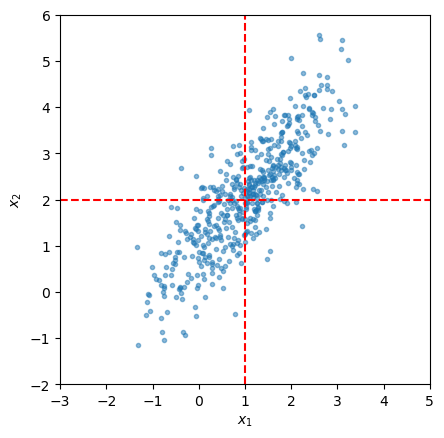

In [3]:
fig, ax = plt.subplots()  # 创建一个绘图窗口
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='.')  # 绘制散点图，透明度为0.5，标记为点

plt.axvline(x=mean[0], color='r', linestyle='--')  # 绘制垂直虚线，表示x方向的均值位置
plt.axhline(y=mean[1], color='r', linestyle='--')  # 绘制水平虚线，表示y方向的均值位置

plt.xlabel(r'$x_1$')  # 设置x轴标签为$x_1$
plt.ylabel(r'$x_2$')  # 设置y轴标签为$x_2$
plt.axis('scaled')  # 将坐标轴缩放为等比例

ax.set_xlim([-3, 5])  # 设置x轴的显示范围为[-3, 5]
ax.set_ylim([-2, 6])  # 设置y轴的显示范围为[-2, 6]

X_df = pd.DataFrame(X, columns=['x_1', 'x_2'])  # 将数据转换为DataFrame格式，便于处理

Text(39.222222222222214, 0.5, '$x_2$')

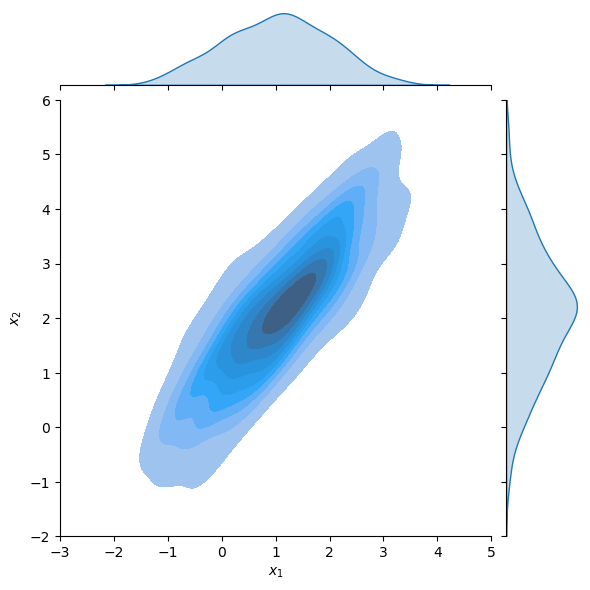

In [4]:
# 使用Seaborn绘制联合分布图
sns.jointplot(data=X_df, x='x_1', y='x_2', kind='kde', fill=True, xlim=(-3, 5), ylim=(-2, 6))  

ax.set_aspect('equal')  # 设置坐标轴比例为相等
plt.xlabel(r'$x_1$')  # 再次设置x轴标签
plt.ylabel(r'$x_2$')  # 再次设置y轴标签

## 主成分分析（PCA）

In [5]:
from sklearn.decomposition import PCA  # 导入PCA模块
pca = PCA(n_components=2)  # 创建一个PCA对象，指定提取两个主成分
pca.fit(X)  # 使用PCA对象对数据进行拟合

PCA(n_components=2)

(-2.0, 6.0)

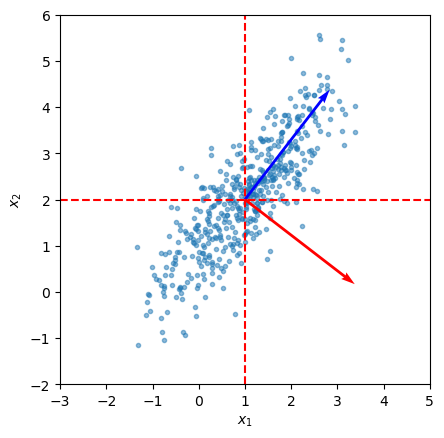

In [6]:
fig, ax = plt.subplots()  # 创建新的绘图窗口
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='.')  # 绘制散点图

plt.axvline(x=mean[0], color='r', linestyle='--')  # 绘制垂直虚线，表示均值
plt.axhline(y=mean[1], color='r', linestyle='--')  # 绘制水平虚线，表示均值

# 第一个主成分的x和y分量
PC1_x = pca.components_[0, 0]  
PC1_y = pca.components_[0, 1]

# 绘制第一主成分方向
ax.quiver(mean[0], mean[1], PC1_x, PC1_y, angles='xy', scale_units='xy', scale=1/3, edgecolor='none', facecolor='b')

# 第二个主成分的x和y分量
PC2_x = pca.components_[1, 0]  
PC2_y = pca.components_[1, 1]

# 绘制第二主成分方向
ax.quiver(mean[0], mean[1], PC2_x, PC2_y, angles='xy', scale_units='xy', scale=1/3, edgecolor='none', facecolor='r')

plt.xlabel(r'$x_1$')  # 设置x轴标签
plt.ylabel(r'$x_2$')  # 设置y轴标签
plt.axis('scaled')  # 坐标轴缩放为等比例

ax.set_xlim([-3, 5])  # 设置x轴的显示范围
ax.set_ylim([-2, 6])  # 设置y轴的显示范围

## 数据转换到主成分坐标

<Axes: ylabel='Density'>

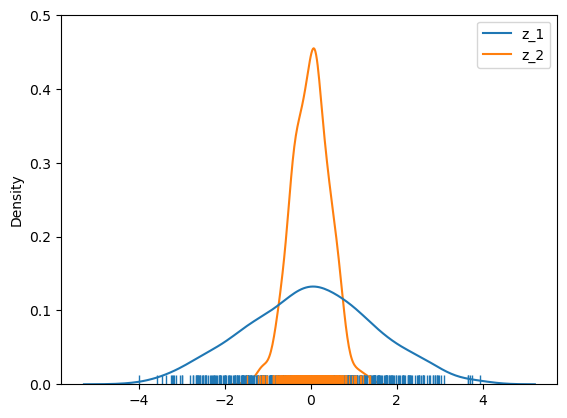

In [7]:
Z = pca.transform(X)  # 将数据转换到主成分坐标系

Z_df = pd.DataFrame(Z, columns=['z_1', 'z_2'])  # 将转换后的数据转换为DataFrame格式

fig, ax = plt.subplots()  # 创建新的绘图窗口
sns.kdeplot(data=Z_df)  # 使用Seaborn绘制转换后数据的核密度估计图
sns.rugplot(data=Z_df)  # 绘制数据在坐标轴上的分布

(-5.0, 5.0)

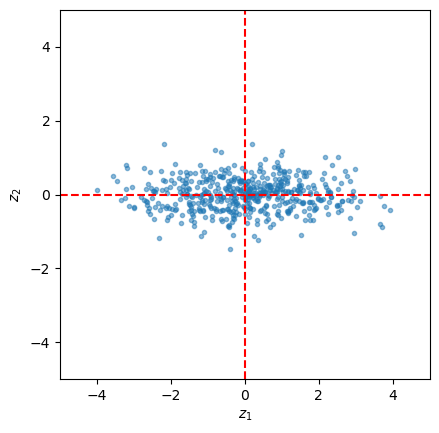

In [8]:
fig, ax = plt.subplots()  # 创建新的绘图窗口
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5, marker='.')  # 绘制转换后数据的散点图

plt.axvline(x=0, color='r', linestyle='--')  # 绘制垂直虚线，表示主成分坐标系的中心
plt.axhline(y=0, color='r', linestyle='--')  # 绘制水平虚线，表示主成分坐标系的中心

plt.xlabel(r'$z_1$')  # 设置x轴标签
plt.ylabel(r'$z_2$')  # 设置y轴标签
plt.axis('scaled')  # 坐标轴缩放为等比例

ax.set_xlim([-5, 5])  # 设置x轴的显示范围
ax.set_ylim([-5, 5])  # 设置y轴的显示范围

Text(39.222222222222214, 0.5, '$z_2$')

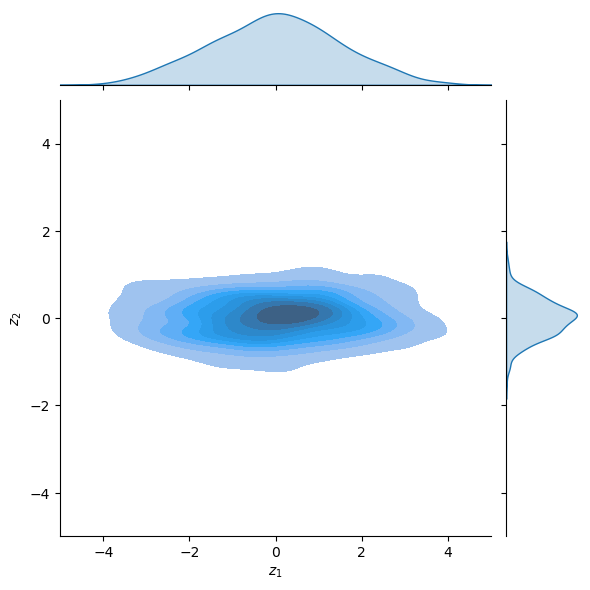

In [9]:
# 使用Seaborn绘制转换后数据的联合分布图
sns.jointplot(data=Z_df, x='z_1', y='z_2', kind='kde', fill=True, xlim=(-5, 5), ylim=(-5, 5))  

ax.set_aspect('equal')  # 设置坐标轴比例为相等
plt.xlabel(r'$z_1$')  # 再次设置x轴标签
plt.ylabel(r'$z_2$')  # 再次设置y轴标签

## 降维操作

In [10]:
pca_PC1 = PCA(n_components=1)  # 创建一个PCA对象，仅提取一个主成分
pca_PC1.fit(X)  # 使用PCA对象对数据进行拟合

PCA(n_components=1)

In [11]:
z1 = pca_PC1.transform(X)  # 将数据投影到第一个主成分上

In [12]:
x1_proj = pca_PC1.inverse_transform(z1)  # 将投影后的数据转换回原坐标系

(-2.0, 6.0)

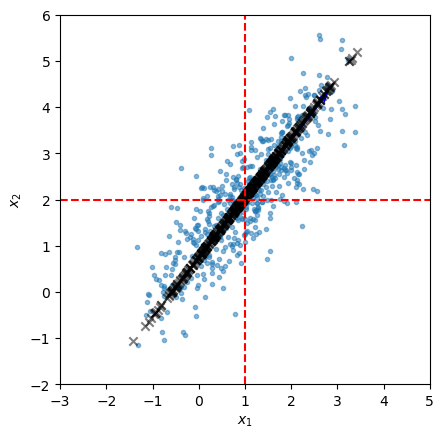

In [13]:
fig, ax = plt.subplots()  # 创建新的绘图窗口
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='.')  # 绘制原数据的散点图

# 第一个主成分的x和y分量
PC1_x = pca_PC1.components_[0, 0]
PC1_y = pca_PC1.components_[0, 1]

# 绘制第一主成分方向
ax.quiver(mean[0], mean[1], PC1_x, PC1_y, angles='xy', scale_units='xy', scale=1/3, edgecolor='none', facecolor='b')

# 绘制降维后的数据点
plt.scatter(x1_proj[:, 0], x1_proj[:, 1], alpha=0.5, c='k', marker='x') 

plt.axvline(x=mean[0], color='r', linestyle='--')  # 绘制垂直虚线，表示均值位置
plt.axhline(y=mean[1], color='r', linestyle='--')  # 绘制水平虚线，表示均值位置

plt.xlabel('$x_1$')  # 设置x轴标签
plt.ylabel('$x_2$')  # 设置y轴标签
plt.axis('scaled')  # 坐标轴缩放为等比例

ax.set_xlim([-3, 5])  # 设置x轴的显示范围
ax.set_ylim([-2, 6])  # 设置y轴的显示范围